In [ ]:
# Import necessary libraries
import scipy.io
import numpy as np
import pandas as pd
from google.colab import files

# Upload the files from your local system
#uploaded = files.upload()

# Function to load .mat file and extract features
def extract_features(data, data_start, data_end, com_text, labels):
    features = []
    for label in labels:
        label_indices = [i for i, text in enumerate(com_text) if label in text]
        for index in label_indices:
            start_sample = int(data_start[index])
            end_sample = start_sample + 10000  # Extracting first 10 seconds, assuming 1kHz sample rate
            data_segment = data[start_sample:end_sample]
            power = np.sum(data_segment ** 2)
            energy = np.sum(np.abs(data_segment))
            peak_frequency = np.argmax(np.abs(np.fft.fft(data_segment))) * 1000 / len(data_segment)
            maximum_amplitude = np.max(np.abs(data_segment))
            mean = np.mean(data_segment)
            svd_values = np.linalg.svd(data_segment.reshape(-1, 1), compute_uv=False)
            variance = np.var(data_segment)
            features.append({
                'label': label,
                'power': power,
                'energy': energy,
                'peak_frequency': peak_frequency,
                'maximum_amplitude': maximum_amplitude,
                'mean': mean,
                'svd': svd_values[0],
                'variance': variance
            })
    return features

# Labels of interest
labels_of_interest = ['relax', 'hold', 'back', 'forward', 'right', 'left']

# Read data.csv to get filenames and additional data
data_csv = pd.read_csv('data.csv')

# List to hold all features from all files
all_features = []

# Process each .mat file listed in the CSV
for filename in data_csv['name']:  # Assuming the column with filenames is called 'filename'
    mat_data = scipy.io.loadmat(filename)
    features = extract_features(mat_data['data'][0], mat_data['datastart'][0],
                                mat_data['dataend'][0], mat_data['comtext'], labels_of_interest)
    all_features += features

# Convert features list to DataFrame
features_df = pd.DataFrame(all_features)

# Combine features with demographic data from CSV
final_data = pd.concat([data_csv, features_df], axis=1)

# Save the combined data to a new CSV file
final_data.to_csv('combined_emg_data.csv', index=False)
print("Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.")

# Download the combined CSV file
files.download('combined_emg_data.csv')


Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import scipy.io
import numpy as np
import pandas as pd
from google.colab import files
import re  # For regular expression operations

# Upload the files from your local system
#uploaded = files.upload()

# Function to load .mat file and extract features, filtering labels as needed
def extract_features(data, data_start, data_end, com_text, labels_of_interest):
    features = []
    for i, text in enumerate(com_text):
        # Remove digits from the label text
        label = re.sub(r'\d+', '', text.strip())
        if label in labels_of_interest:
            # Calculate start and end samples for extracting first 10 seconds
            start_sample = int(data_start[i])
            end_sample = start_sample + 10000  # Extracting first 10 seconds, assuming 1kHz sample rate
            data_segment = data[start_sample:end_sample]
            power = np.sum(data_segment ** 2)
            energy = np.sum(np.abs(data_segment))
            peak_frequency = np.argmax(np.abs(np.fft.fft(data_segment))) * 1000 / len(data_segment)
            maximum_amplitude = np.max(np.abs(data_segment))
            mean = np.mean(data_segment)
            svd_values = np.linalg.svd(data_segment.reshape(-1, 1), compute_uv=False)
            variance = np.var(data_segment)
            features.append({
                'label': label,
                'power': power,
                'energy': energy,
                'peak_frequency': peak_frequency,
                'maximum_amplitude': maximum_amplitude,
                'mean': mean,
                'svd': svd_values[0],
                'variance': variance
            })
    return features

# Labels of interest, excluding 'grasp' and 'relief'
labels_of_interest = ['relax', 'hold', 'back', 'forward', 'right', 'left']

# Read data.csv to get filenames and additional data
data_csv = pd.read_csv('data.csv')

# List to hold all features from all files
all_features = []

# Process each .mat file listed in the CSV
for filename in data_csv['name']:  # Assuming the column with filenames is called 'filename'
    mat_data = scipy.io.loadmat(filename)
    features = extract_features(mat_data['data'][0], mat_data['datastart'][0],
                                mat_data['dataend'][0], mat_data['comtext'], labels_of_interest)
    all_features += features

# Convert features list to DataFrame
features_df = pd.DataFrame(all_features)

# Combine features with demographic data from CSV
final_data = pd.concat([data_csv, features_df], axis=1)

# Save the combined data to a new CSV file
final_data.to_csv('combined_emg_data.csv', index=False)
print("Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.")

# Download the combined CSV file
files.download('combined_emg_data.csv')


Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import scipy.io
import numpy as np
import pandas as pd
from google.colab import files
import re  # For regular expression operations

# Upload the files from your local system
#uploaded = files.upload()

# Function to load .mat file and extract features, ensuring demographic data repeats correctly
def extract_features(data, data_start, data_end, com_text, labels_of_interest, demographic_info):
    features = []
    for i, text in enumerate(com_text):
        # Remove digits from the label text
        label = re.sub(r'\d+', '', text.strip())
        if label in labels_of_interest:
            # Calculate start and end samples for extracting first 10 seconds
            start_sample = int(data_start[i])
            end_sample = start_sample + 10000  # Extracting first 10 seconds, assuming 1kHz sample rate
            data_segment = data[start_sample:end_sample]
            power = np.sum(data_segment ** 2)
            energy = np.sum(np.abs(data_segment))
            peak_frequency = np.argmax(np.abs(np.fft.fft(data_segment))) * 1000 / len(data_segment)
            maximum_amplitude = np.max(np.abs(data_segment))
            mean = np.mean(data_segment)
            svd_values = np.linalg.svd(data_segment.reshape(-1, 1), compute_uv=False)
            variance = np.var(data_segment)
            feature_dict = {
                'label': label,
                'power': power,
                'energy': energy,
                'peak_frequency': peak_frequency,
                'maximum_amplitude': maximum_amplitude,
                'mean': mean,
                'svd': svd_values[0],
                'variance': variance
            }
            # Combine feature dict with demographic info
            feature_dict.update(demographic_info)
            features.append(feature_dict)
    return features

# Labels of interest, excluding 'grasp' and 'relief'
labels_of_interest = ['relax', 'hold', 'back', 'forward', 'right', 'left']

# Read data.csv to get filenames and additional data
data_csv = pd.read_csv('data.csv')

# List to hold all features from all files
all_features = []

# Process each .mat file listed in the CSV
for index, row in data_csv.iterrows():
    filename = row['name']  # Assuming the column with filenames is called 'name'
    mat_data = scipy.io.loadmat(filename)
    demographic_info = row.to_dict()
    features = extract_features(mat_data['data'][0], mat_data['datastart'][0],
                                mat_data['dataend'][0], mat_data['comtext'], labels_of_interest, demographic_info)
    all_features += features

# Convert features list to DataFrame
features_df = pd.DataFrame(all_features)

# Save the combined data to a new CSV file
features_df.to_csv('combined_emg_data.csv', index=False)
print("Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.")

# Download the combined CSV file
files.download('combined_emg_data.csv')


Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import scipy.io
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
from google.colab import files
import re  # For regular expression operations

# Function to create a bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = filtfilt(b, a, data)
    return y

# Function to load .mat file, apply bandpass filter, and extract features
def extract_features(data, data_start, data_end, com_text, labels_of_interest, demographic_info, fs):
    features = []
    for i, text in enumerate(com_text):
        # Remove digits from the label text
        label = re.sub(r'\d+', '', text.strip())
        if label in labels_of_interest:
            start_sample = int(data_start[i])
            end_sample = start_sample + fs * 10  # Extracting first 10 seconds, assuming fs sample rate
            data_segment = data[start_sample:end_sample]
            # Apply bandpass filter
            filtered_data = bandpass_filter(data_segment, 10, 400, fs)
            # Compute features
            power = np.sum(filtered_data ** 2)
            energy = np.sum(np.abs(filtered_data))
            peak_frequency = np.argmax(np.abs(np.fft.fft(filtered_data))) * fs / len(filtered_data)
            maximum_amplitude = np.max(np.abs(filtered_data))
            mean = np.mean(filtered_data)
            svd_values = np.linalg.svd(filtered_data.reshape(-1, 1), compute_uv=False)
            variance = np.var(filtered_data)
            feature_dict = {
                'label': label,
                'power': power,
                'energy': energy,
                'peak_frequency': peak_frequency,
                'maximum_amplitude': maximum_amplitude,
                'mean': mean,
                'svd': svd_values[0],
                'variance': variance
            }
            # Combine feature dict with demographic info
            feature_dict.update(demographic_info)
            features.append(feature_dict)
    return features

# Upload files
#uploaded = files.upload()

# Labels of interest, excluding 'grasp' and 'relief'
labels_of_interest = ['relax', 'hold', 'back', 'forward', 'right', 'left']

# Read data.csv to get filenames and additional data
data_csv = pd.read_csv('data.csv')

# List to hold all features from all files
all_features = []

# Sample rate (should be specified or read from the .mat files if variable)
fs = 1000

# Process each .mat file listed in the CSV
for index, row in data_csv.iterrows():
    filename = row['name']
    mat_data = scipy.io.loadmat(filename)
    demographic_info = row.to_dict()
    features = extract_features(mat_data['data'][0], mat_data['datastart'][0],
                                mat_data['dataend'][0], mat_data['comtext'], labels_of_interest, demographic_info, fs)
    all_features += features

# Convert features list to DataFrame
features_df = pd.DataFrame(all_features)

# Save the combined data to a new CSV file
features_df.to_csv('combined_emg_data.csv', index=False)
print("Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.")

# Download the combined CSV file
files.download('combined_emg_data.csv')


Data processing complete. The combined data has been saved to 'combined_emg_data.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Load the data
data = pd.read_csv('combined_emg_data.csv')

# Check for any non-numeric columns and drop them (excluding the target label)
non_numeric_columns = ['name']  # Add any other non-numeric columns you know of
data = data.drop(non_numeric_columns, axis=1)

# Preprocess the data
# Convert categorical data to numeric if necessary (assuming 'label' is your target)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Select features and target
X = data.drop(['label'], axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate the models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Optionally, save the trained models for later use
import joblib
for name, model in models.items():
    joblib.dump(model, f'{name}_model.pkl')


Random Forest Accuracy: 0.5846
              precision    recall  f1-score   support

           0       0.36      0.36      0.36        11
           1       0.67      0.67      0.67         9
           2       0.44      0.54      0.48        13
           3       0.50      0.25      0.33         8
           4       0.92      1.00      0.96        12
           5       0.58      0.58      0.58        12

    accuracy                           0.58        65
   macro avg       0.58      0.57      0.56        65
weighted avg       0.58      0.58      0.58        65

KNN Accuracy: 0.4154
              precision    recall  f1-score   support

           0       0.32      0.55      0.40        11
           1       0.29      0.22      0.25         9
           2       0.33      0.31      0.32        13
           3       0.36      0.50      0.42         8
           4       0.90      0.75      0.82        12
           5       0.33      0.17      0.22        12

    accuracy             

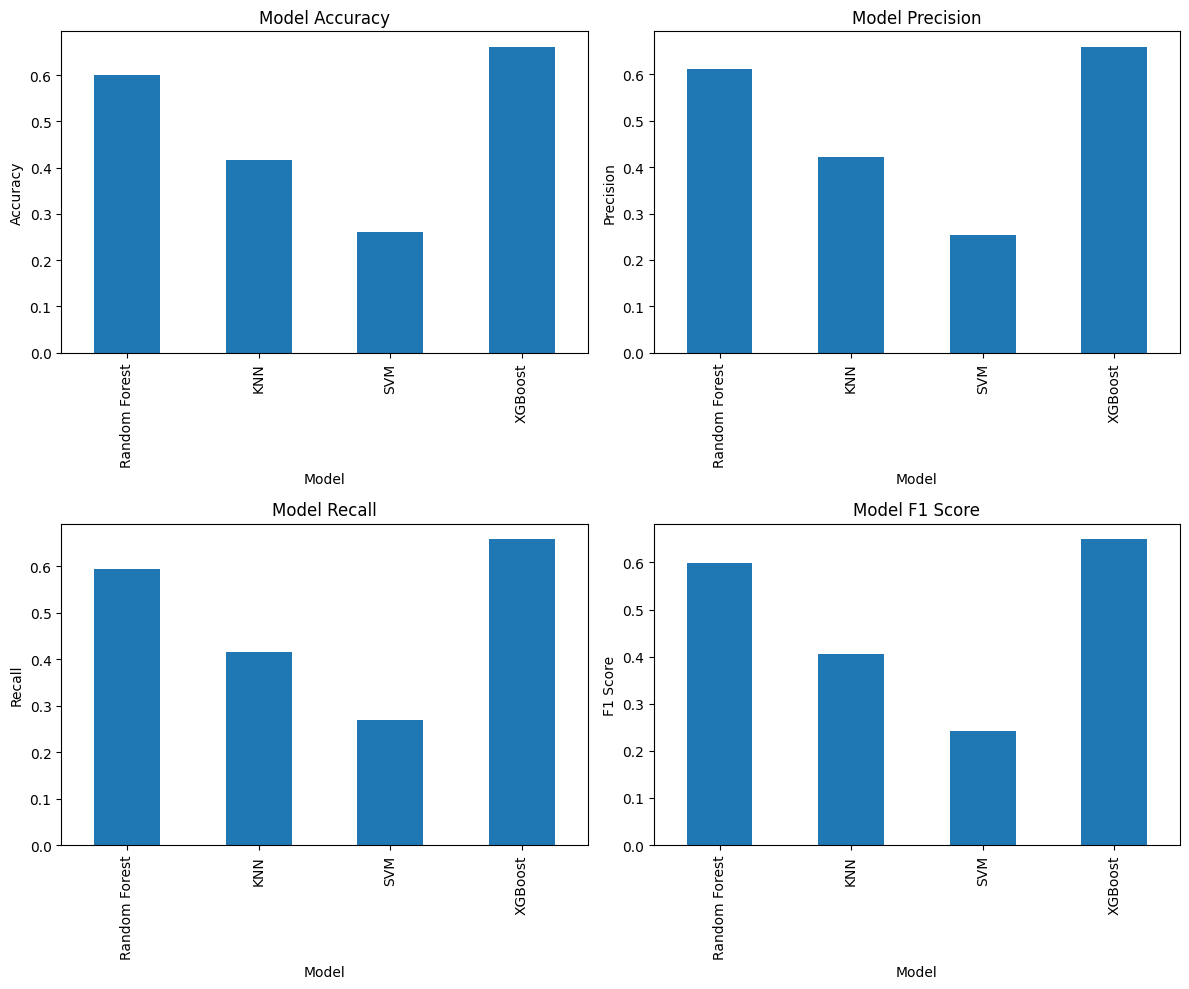

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Load the data
data = pd.read_csv('combined_emg_data.csv')

# Drop non-numeric columns if necessary (like 'name')
data = data.drop(['name'], axis=1)

# Encode the target variable
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Define features and target
X = data.drop('label', axis=1)
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classification models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Dictionary to store performance metrics
metrics_results = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Model': []}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_results['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    metrics_results['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    metrics_results['F1 Score'].append(f1_score(y_test, y_pred, average='macro'))
    metrics_results['Model'].append(name)

# Convert metrics results to DataFrame
results_df = pd.DataFrame(metrics_results)
results_df.to_csv('model_classification_metrics.csv', index=False)

# Plotting the results
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
results_df.set_index('Model', inplace=True)
results_df['Accuracy'].plot(kind='bar', ax=ax[0, 0])
ax[0, 0].set_title('Model Accuracy')
ax[0, 0].set_ylabel('Accuracy')

results_df['Precision'].plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Model Precision')
ax[0, 1].set_ylabel('Precision')

results_df['Recall'].plot(kind='bar', ax=ax[1, 0])
ax[1, 0].set_title('Model Recall')
ax[1, 0].set_ylabel('Recall')

results_df['F1 Score'].plot(kind='bar', ax=ax[1, 1])
ax[1, 1].set_title('Model F1 Score')
ax[1, 1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()


Random Forest Model - Accuracy: 0.6308

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.55      0.67      0.60         9
           2       0.58      0.54      0.56        13
           3       0.43      0.38      0.40         8
           4       1.00      1.00      1.00        12
           5       0.69      0.75      0.72        12

    accuracy                           0.63        65
   macro avg       0.61      0.62      0.61        65
weighted avg       0.63      0.63      0.63        65



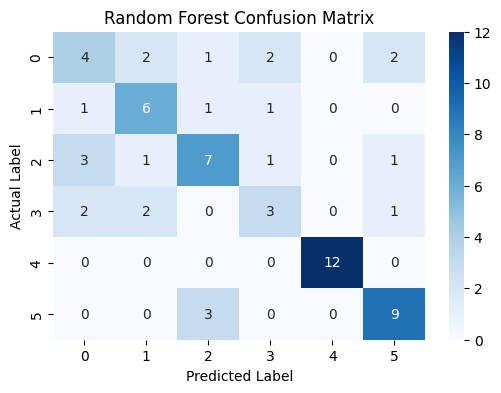

KNN Model - Accuracy: 0.4923

KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.55      0.44        11
           1       0.56      0.56      0.56         9
           2       0.36      0.31      0.33        13
           3       0.43      0.38      0.40         8
           4       0.90      0.75      0.82        12
           5       0.42      0.42      0.42        12

    accuracy                           0.49        65
   macro avg       0.51      0.49      0.49        65
weighted avg       0.51      0.49      0.50        65



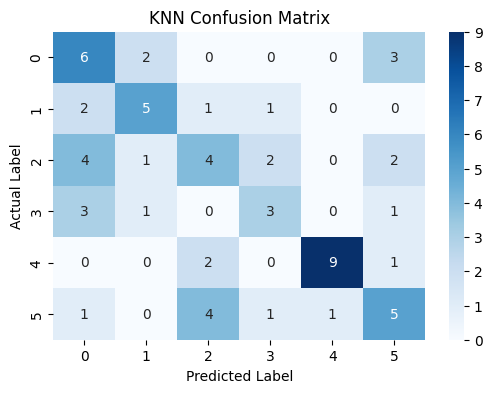

SVM Model - Accuracy: 0.4923

SVM - Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.60      0.67      0.63         9
           2       0.20      0.15      0.17        13
           3       0.50      0.38      0.43         8
           4       0.92      1.00      0.96        12
           5       0.47      0.75      0.58        12

    accuracy                           0.49        65
   macro avg       0.45      0.49      0.46        65
weighted avg       0.44      0.49      0.46        65



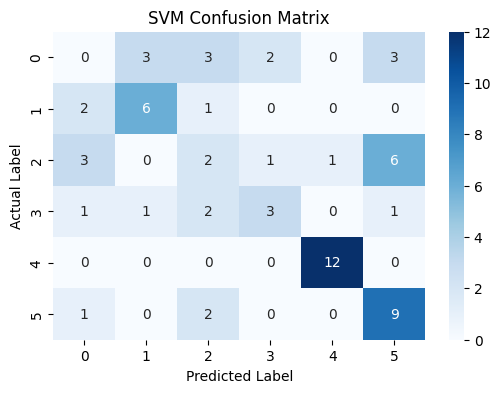

XGBoost Model - Accuracy: 0.6615

XGBoost - Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.36      0.38        11
           1       0.67      0.67      0.67         9
           2       0.75      0.46      0.57        13
           3       0.56      0.62      0.59         8
           4       1.00      1.00      1.00        12
           5       0.59      0.83      0.69        12

    accuracy                           0.66        65
   macro avg       0.66      0.66      0.65        65
weighted avg       0.67      0.66      0.66        65



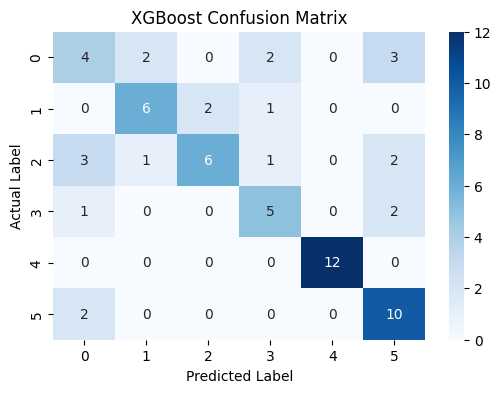

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns

# Load the data
data = pd.read_csv('combined_emg_data.csv')

# Drop non-numeric columns such as 'name'
data = data.drop(['name'], axis=1)  # Adjust this if there are more non-numeric columns

# Encode the target variable
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Define features and target
X = data.drop('label', axis=1)
y = data['label']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

# Define the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(kernel='linear'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Model - Accuracy: {accuracy:.4f}")
    print(f"\n{name} - Classification Report:\n", classification_report(y_test, y_pred))

    # Plotting the confusion matrix for each model
    conf_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
